In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_theme(style="darkgrid")

# Data preprocessing

In [37]:
load = pd.read_csv('data/load.csv')

In [42]:
def df_formatting(df):
    """
    Input: dataframe in the load.csv format
    Output: two dataframes with a line per meter_id, with the following columns
    - meter_id
    - timesteps: array of timesteps
    - load: array of load values
    The train dataset goes up to the end of 2010, and the test df contains the whole 2011 year
    """
    new_df_train = pd.DataFrame(columns=['meter_id', 'timesteps', 'load'])
    new_df_test = pd.DataFrame(columns=['meter_id', 'timesteps', 'load'])
    meter_id = 0
    timesteps_train, load_train = "", ""
    timesteps_test, load_test = "", ""
    for _,line in df.iterrows():
        current_id = line['meter_id']
        if current_id != meter_id:
            if meter_id != 0:
                new_df_train = new_df_train.append({'meter_id': meter_id, 'timesteps': timesteps_train, 'load': load_train}, ignore_index=True)
                new_df_test = new_df_test.append({'meter_id': meter_id, 'timesteps': timesteps_test, 'load': load_test}, ignore_index=True)
            meter_id = current_id
            timesteps_train, load_train = [], []
            timesteps_test, load_test = [], []
        for hour in range(1, 25):
            month, day, year = line['date'].split('/')
            if int(year) < 2011:
                timesteps_train.append(datetime(int(year), int(month), int(day), hour - 1, 0))
                load_train.append(line['h'+str(hour)])
            else:
                timesteps_test.append(datetime(int(year), int(month), int(day), hour - 1, 0))
                load_test.append(line['h'+str(hour)])
    return new_df_train, new_df_test

train, test = df_formatting(load)

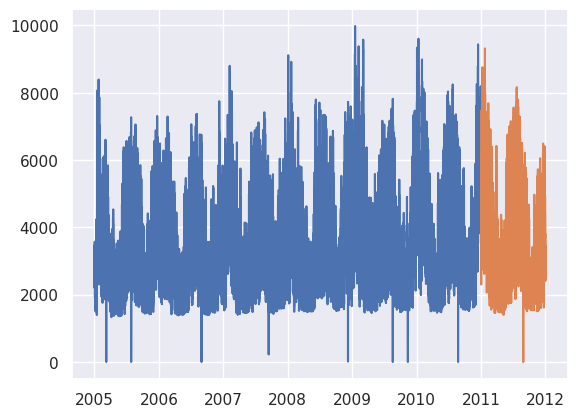

In [46]:
plt.plot(train.iloc[0]['timesteps'], train.iloc[0]['load'])
plt.plot(test.iloc[0]['timesteps'], test.iloc[0]['load'])
plt.show()

In [44]:
train.to_csv('data_preproc/load_train.csv', index=False)
test.to_csv('data_preproc/load_test.csv', index=False)

# SARIMA

In [64]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import acf, pacf

In [69]:
X_train1 = train.iloc[0]['timesteps'][-365*24*2:]
y_train1 = train.iloc[0]['load'][-365*24*2:]
X_test1 = test.iloc[0]['timesteps']
y_test1 = test.iloc[0]['load']

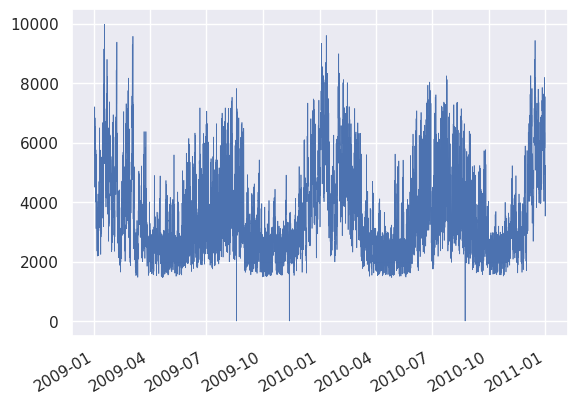

In [70]:
fig, ax = plt.subplots()
ax.plot(X_train1, y_train1, linewidth=0.5)
fig.autofmt_xdate()

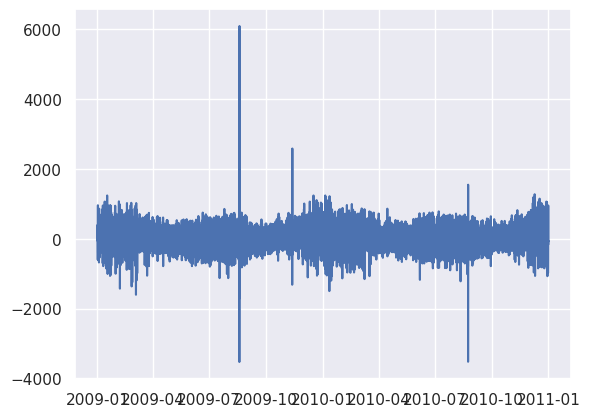

In [73]:
# order 1 differencing to remove trend
train_df = pd.DataFrame({'load': y_train1, 'timesteps': X_train1})
train_df['load_diff'] = train_df['load'].diff()
plt.plot(train_df['timesteps'], train_df['load_diff'])
plt.show()